
## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, probplot
from scipy.stats import zscore
from scipy.stats import stats
import seaborn as sns
sns.set()

## 2. Data Loading

In [2]:
Inventory = pd.read_csv("Inventory.csv")
Purchases = pd.read_csv("PurchasesInvoices.csv")
Sales = pd.read_csv("SalesFINAL12312016.csv")
inventory = pd.read_csv("Inventory.csv")


### Purchases Data Exploration and Transformation

In [149]:
# Check the head of Purchases
Purchases.head()

,InventoryId,Store,Brand,Size,VendorNumber,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification,Freight
0,69_MOUNTMEND_8412,69,8412,750mL,105,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1,3.470000
1,30_CULCHETH_5255,30,5255,1.75L,4466,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1,2.285333
2,34_PITMERDEN_5215,34,5215,1.75L,4466,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1,2.856667
3,1_HARDERSFIELD_5255,1,5255,1.75L,4466,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1,3.428000
4,76_DONCASTER_2034,76,2034,750mL,388,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1,4.610000


In [50]:
# Check purchases Info
Purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372471 entries, 0 to 2372470
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   InventoryId     object 
 1   Store           int64  
 2   Brand           int64  
 3   Size            object 
 4   VendorNumber    int64  
 5   PONumber        int64  
 6   PODate          object 
 7   ReceivingDate   object 
 8   InvoiceDate     object 
 9   PayDate         object 
 10  PurchasePrice   float64
 11  Quantity        int64  
 12  Dollars         float64
 13  Classification  int64  
 14  Freight         float64
dtypes: float64(3), int64(6), object(6)
memory usage: 271.5+ MB


In [51]:
# Convert Date to datetime
Purchases['PODate'] = pd.to_datetime(Purchases['PODate'], errors = "coerce")
Purchases['ReceivingDate'] = pd.to_datetime(Purchases['ReceivingDate'], errors = "coerce")
Purchases['InvoiceDate'] = pd.to_datetime(Purchases['InvoiceDate'] , errors = "coerce")
Purchases['PayDate'] = pd.to_datetime(Purchases['PayDate'], errors = "coerce")

In [52]:
# Convert Object and int cols to Category if appropriate
for col in Purchases.select_dtypes(include=["object" , "int"]).columns :
    unique_values = Purchases[col].nunique()
    num_values = len(Purchases[col])
    if unique_values / num_values < 0.5:
        Purchases[col] = Purchases[col].astype("category")

In [53]:
# Convert Quantity to int
Purchases["Quantity"] = Purchases["Quantity"].astype("int")

In [54]:
# Summary Sta for numeical features
Purchases.select_dtypes("float").describe().T

,count,mean,std,min,25%,50%,75%,max
PurchasePrice,2372471.0,12.050021,17.945040,0.000000,6.120000,9.220000,14.490000,5681.81000
Dollars,2372471.0,135.681567,281.665105,0.000000,49.260000,83.930000,140.520000,50175.70000
Freight,2372471.0,0.736620,1.511602,0.005367,0.244104,0.420634,0.672501,313.86297


In [55]:
# Summary Sta for category features
Purchases.select_dtypes("category").describe().T

,count,unique,top,freq
InventoryId,2372471,245906,73_DONCASTER_8068,180
Store,2372471,80,76,121123
Brand,2372471,10663,8068,7359
Size,2372471,51,750mL,1207700
VendorNumber,2372471,126,3960,243326
PONumber,2372471,5543,10936,6108
Classification,2372471,2,1,1320232


In [85]:
# Missing values
(Purchases.isna()
.mean()
.mul(100)
.pipe(lambda x : x[x > 0]))

Series([], dtype: float64)

In [91]:
# List of columns to check for outliers
columns_to_check = ['PurchasePrice', 'Quantity', 'Dollars', 'Freight']

# Create a dictionary to store the count of outliers
outliers_count = {}

# Loop through each column and calculate outliers
for column in columns_to_check:
    # Calculate Z-Scores
    z_scores = stats.zscore(Purchases[column].dropna())  # Drop NaNs before calculation
    
    # Define a threshold for outliers
    threshold = 3
    
    # Count outliers
    outliers = (abs(z_scores) > threshold).sum()
    outliers_count[column] = outliers

# Print the number of outliers for each column
for column, count in outliers_count.items():
    print(f"Number of outliers in '{column}': {count}")


/var/folders/1t/pv8cn83n2vj7x2cv3ddb0rp00000gn/T/ipykernel_33698/484414571.py:10: DeprecationWarning: Please import `zscore` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  z_scores = stats.zscore(Purchases[column].dropna())  # Drop NaNs before calculation
/var/folders/1t/pv8cn83n2vj7x2cv3ddb0rp00000gn/T/ipykernel_33698/484414571.py:10: DeprecationWarning: Please import `zscore` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  z_scores = stats.zscore(Purchases[column].dropna())  # Drop NaNs before calculation


Number of outliers in 'PurchasePrice': 10470
Number of outliers in 'Quantity': 60314
Number of outliers in 'Dollars': 22902
Number of outliers in 'Freight': 36560


/var/folders/1t/pv8cn83n2vj7x2cv3ddb0rp00000gn/T/ipykernel_33698/484414571.py:10: DeprecationWarning: Please import `zscore` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  z_scores = stats.zscore(Purchases[column].dropna())  # Drop NaNs before calculation
/var/folders/1t/pv8cn83n2vj7x2cv3ddb0rp00000gn/T/ipykernel_33698/484414571.py:10: DeprecationWarning: Please import `zscore` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  z_scores = stats.zscore(Purchases[column].dropna())  # Drop NaNs before calculation


### Numerical features Viz & Analysis

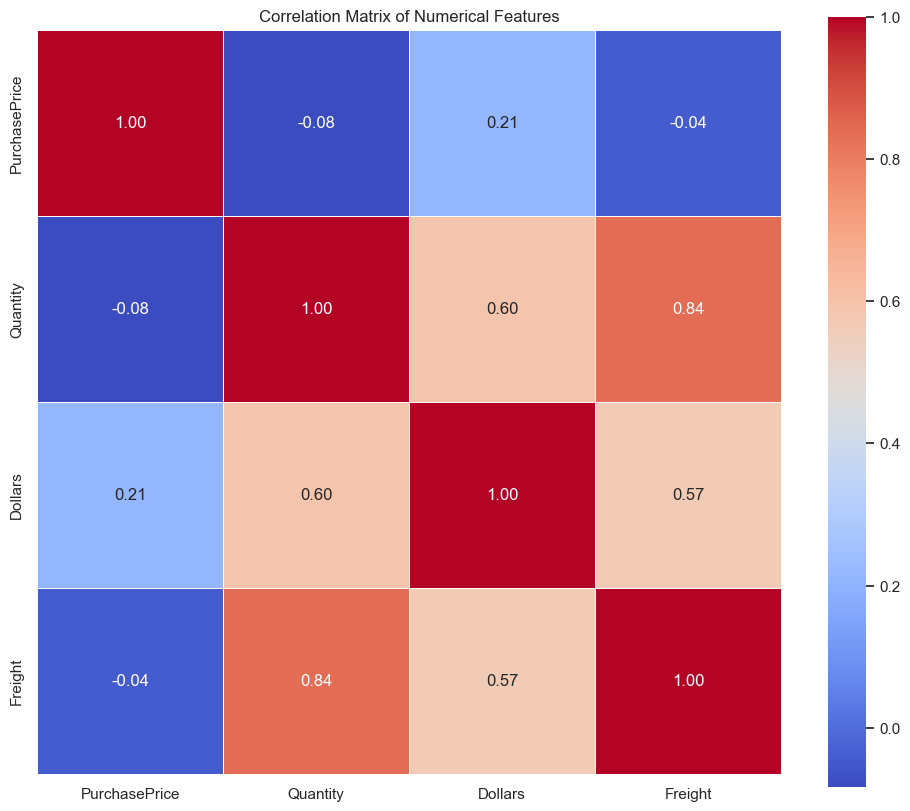

In [57]:
# Select numerical columns
numerical_cols = Purchases.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = Purchases[numerical_cols].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


/var/folders/1t/pv8cn83n2vj7x2cv3ddb0rp00000gn/T/ipykernel_33698/3117472058.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vendor_purchases = Purchases.groupby('VendorNumber')['PurchasePrice'].sum()
/var/folders/1t/pv8cn83n2vj7x2cv3ddb0rp00000gn/T/ipykernel_33698/3117472058.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_Vendors.values, y=top_Vendors.index, palette='viridis', orient='h')


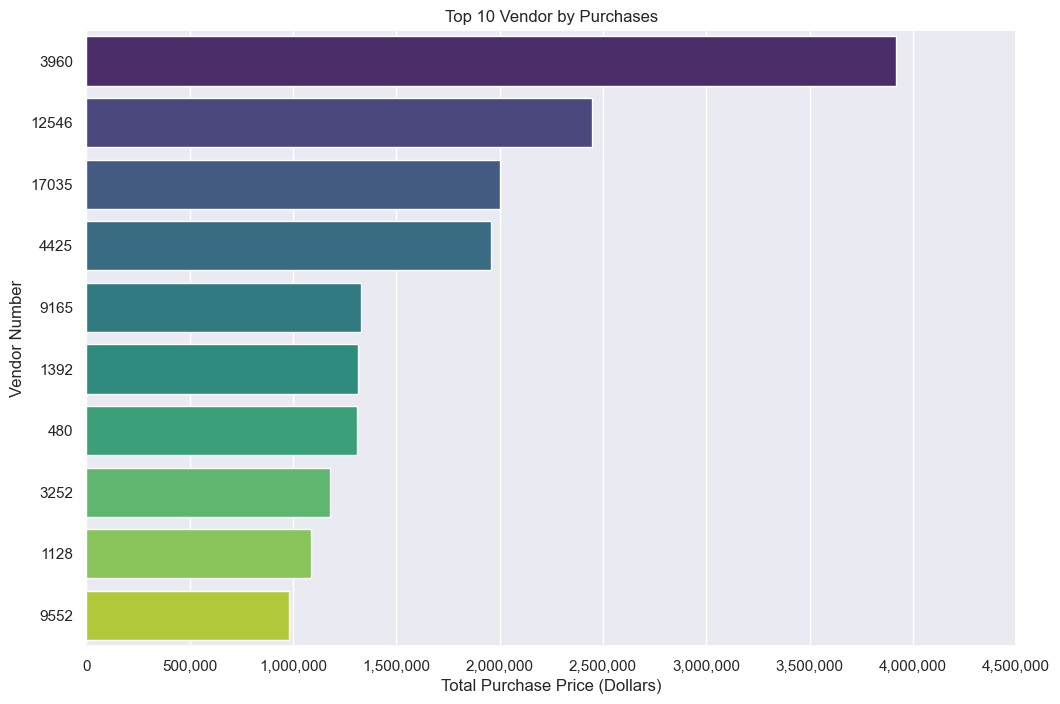

In [58]:
# Group by VendorNumber and sum the purchase amounts
vendor_purchases = Purchases.groupby('VendorNumber')['PurchasePrice'].sum()

# Sort the vendors by the total purchases in descending order and get the top 10
top_Vendors = vendor_purchases.sort_values(ascending=False).head(10)

# Convert the index to string for better plotting
top_Vendors.index = top_Vendors.index.astype(str)

# Plot the top 10 vendors using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_Vendors.values, y=top_Vendors.index, palette='viridis', orient='h')

# Manually set the x-axis labels to ensure correct scale
plt.xticks(ticks=plt.xticks()[0], labels=[f'{int(x):,}' for x in plt.xticks()[0]])

plt.title('Top 10 Vendor by Purchases')
plt.xlabel('Total Purchase Price (Dollars)')
plt.ylabel('Vendor Number')
plt.show()


/var/folders/1t/pv8cn83n2vj7x2cv3ddb0rp00000gn/T/ipykernel_33698/2274632159.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Brand_purchases = Purchases.groupby('Brand')['PurchasePrice'].sum()
/var/folders/1t/pv8cn83n2vj7x2cv3ddb0rp00000gn/T/ipykernel_33698/2274632159.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_Brand.values, y=top_Brand.index, palette='viridis', orient='h')


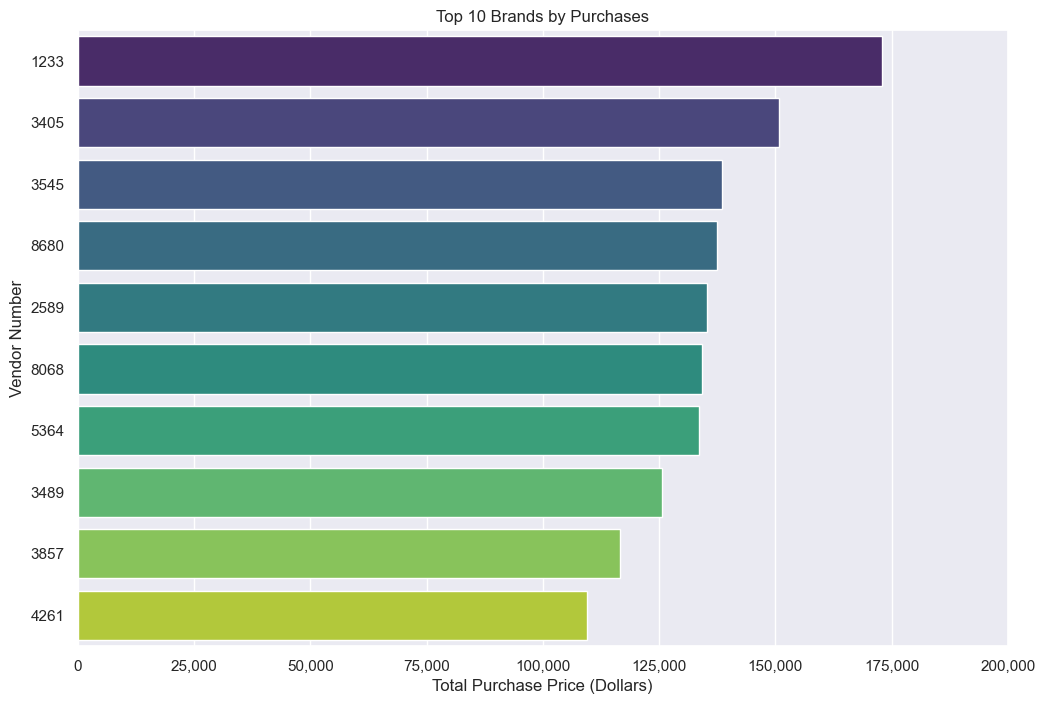

In [59]:
# Group by VendorNumber and sum the purchase amounts (using 'Dollars' as an example)
Brand_purchases = Purchases.groupby('Brand')['PurchasePrice'].sum()

# Sort the vendors by the total purchases in descending order and get the top 10
top_Brand = Brand_purchases.sort_values(ascending=False).head(10)

# Convert the index to string for better plotting
top_Brand.index = top_Brand.index.astype(str)

# Plot the top 10 vendors using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_Brand.values, y=top_Brand.index, palette='viridis', orient='h')

# Manually set the x-axis labels to ensure correct scale
plt.xticks(ticks=plt.xticks()[0], labels=[f'{int(x):,}' for x in plt.xticks()[0]])

plt.title('Top 10 Brands by Purchases')
plt.xlabel('Total Purchase Price (Dollars)')
plt.ylabel('Vendor Number')
plt.show()


In [204]:
top_Vendors

VendorNumber
3960     3919293.52
12546    2445075.37
17035    2002210.70
4425     1958978.44
9165     1328577.74
1392     1316920.86
480      1309369.34
3252     1179960.50
1128     1089218.08
9552      979018.30
Name: PurchasePrice, dtype: float64

### Average Payment Duration

In [60]:
# Calculate Payment Duration
Purchases['PaymentDuration'] = (Purchases['PayDate'] - Purchases['InvoiceDate']).dt.days

# Calculate Average Payment Duration
average_payment_duration = Purchases['PaymentDuration'].mean()
print(f"Average Payment Duration: {average_payment_duration} days")

Average Payment Duration: 35.658806366863914 days


### Financial Performance

In [61]:
# Total Expenditure
total_expenditure = Purchases[['Dollars', 'Freight']].sum().sum()
total_expenditure


323648193.6512903

### Vendor Performance and Lead Time

In [62]:
# Calculate Supply Duration
Purchases['SupplyDuration'] = (Purchases['ReceivingDate'] - Purchases['PODate']).dt.days

# Calculate Average Supply Duration
average_supply_duration = Purchases['SupplyDuration'].mean()
print(f"Average Supply Duration: {average_supply_duration} days")

Average Supply Duration: 7.620737197630656 days


### Total Purchase Cost per Period

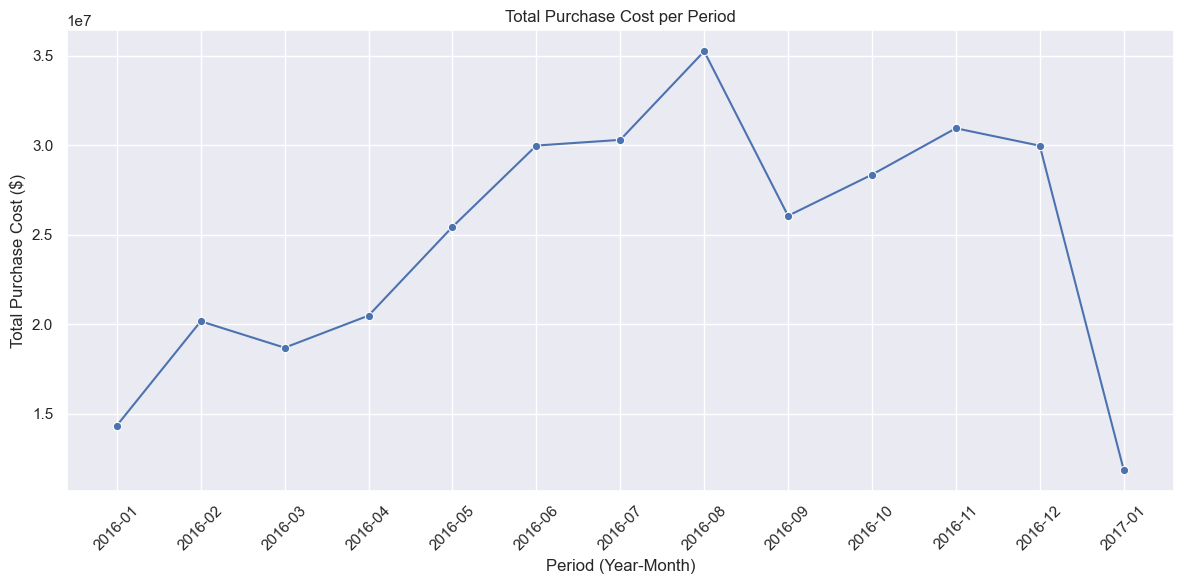

In [92]:
# Calculate Total Purchase Cost per Period
Purchases['YearMonth'] = Purchases['InvoiceDate'].dt.to_period('M')
total_purchase_cost_per_period = Purchases.groupby('YearMonth')['Dollars'].sum().reset_index()

# Convert YearMonth to string for plotting 
total_purchase_cost_per_period['YearMonth'] = total_purchase_cost_per_period['YearMonth'].astype(str)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='Dollars', data=total_purchase_cost_per_period, marker='o')
plt.xticks(rotation=45)
plt.title('Total Purchase Cost per Period')
plt.xlabel('Period (Year-Month)')
plt.ylabel('Total Purchase Cost ($)')
plt.grid(True)
plt.tight_layout()


In [98]:
Sales['SalesDate'] = pd.to_datetime(Sales['SalesDate'], errors = "coerce")

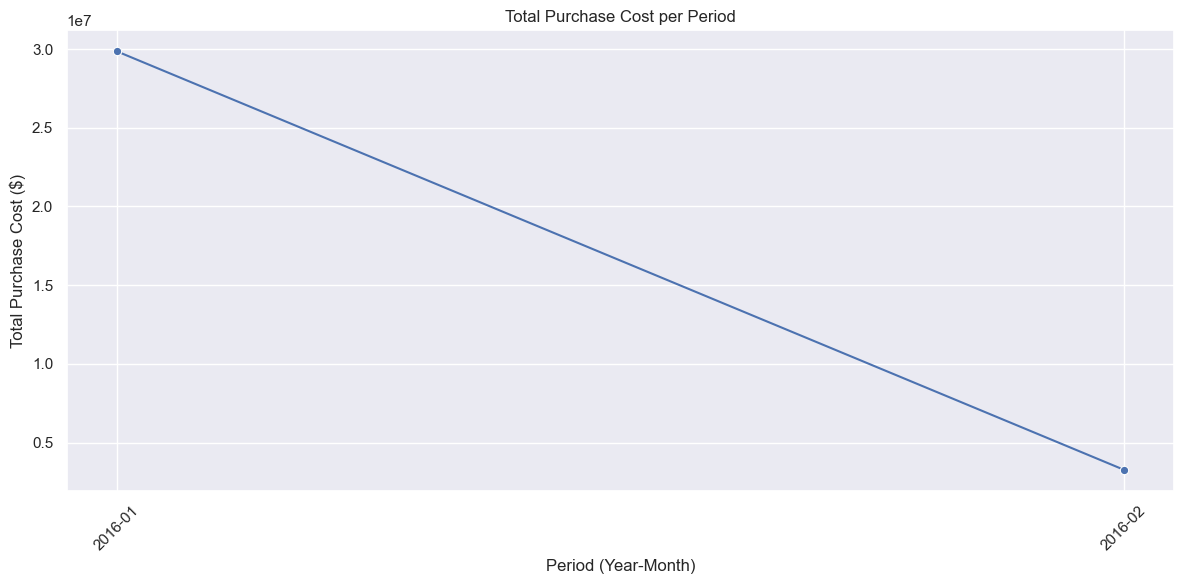

In [101]:

# Calculate Total Purchase Cost per Period
Purchases['YearMonth'] = Sales['SalesDate'].dt.to_period('M')
total_purchase_cost_per_period = Sales.groupby('YearMonth')['SalesDollars'].sum().reset_index()

# Convert YearMonth to string for plotting 
total_purchase_cost_per_period['YearMonth'] = total_purchase_cost_per_period['YearMonth'].astype(str)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='SalesDollars', data=total_purchase_cost_per_period, marker='o')
plt.xticks(rotation=45)
plt.title('Total Purchase Cost per Period')
plt.xlabel('Period (Year-Month)')
plt.ylabel('Total Purchase Cost ($)')
plt.grid(True)
plt.tight_layout()


#### Key Observations:

The highest expenditure occurred in August 2016, reaching over $35 million.
There was a noticeable peak in purchase costs around mid-2016, with August being the highest.
After a peak in August, there was a gradual decline in costs towards the end of 2016.
The beginning of 2017 saw a significant decrease in total purchase costs.
This data highlights fluctuations in purchasing costs throughout the year, showing periods of high and lower spending.

### Total Purchase Cost per Store

In [64]:
# Calculate Total purchases per store
total_purchase_cost_stores = Purchases.groupby('Store')['Dollars'].sum().sort_values(ascending=False).head(10)
total_purchase_cost_stores


/var/folders/1t/pv8cn83n2vj7x2cv3ddb0rp00000gn/T/ipykernel_33698/89371544.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_purchase_cost_stores = Purchases.groupby('Store')['Dollars'].sum().sort_values(ascending=False).head(10)


Store
76    17525106.25
73    15067956.85
34    14460077.87
50    14317350.83
38    13516574.29
66    12243511.19
67    10434986.99
69    10039710.63
60     8425066.74
15     7599487.84
Name: Dollars, dtype: float64

In [66]:
# Category Performance
category_performance = Purchases.groupby('Classification')['Dollars'].sum()
category_performance

/var/folders/1t/pv8cn83n2vj7x2cv3ddb0rp00000gn/T/ipykernel_33698/2961064102.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_performance = Purchases.groupby('Classification')['Dollars'].sum()


Classification
1    2.169647e+08
2    1.049358e+08
Name: Dollars, dtype: float64

# Sales Analysis and Metrics

In [5]:
# head od sales 
Sales.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


### ABC Analysis (Based on Consumption Value)

In [3]:
# Calculating the Consumption value
Inventory["ConsumptionValue"] = Inventory["Price"] * Inventory["SalesQuantity"]

# Sort values based on ConsumptionValue
Inventory = Inventory.sort_values(by="ConsumptionValue", ascending=False)

# Calculating the Cumulative Value
Inventory["CumulativeValue"] = Inventory["ConsumptionValue"].cumsum()

# Calculate the total cumulative value
total_value = Inventory["CumulativeValue"].iloc[-1]  # Use the last value for total

# Calculating the Cumulative Percentage
Inventory["CumulativePercentage"] = 100 * Inventory["CumulativeValue"] / total_value



In [4]:

# Define the ABC classification function
def classify_abc(cumulative_percentage):
    if cumulative_percentage <= 70:
        return 'A'
    elif cumulative_percentage <= 90:
        return 'B'
    else:
        return 'C'

# Apply the ABC classification function to the correct DataFrame
Inventory['ABC_Class'] = Inventory['CumulativePercentage'].apply(classify_abc)

# Display the ABC classification
abc_classification = Inventory[['InventoryId', 'ConsumptionValue', 'CumulativePercentage', 'ABC_Class']]

abc_classification


,InventoryId,ConsumptionValue,CumulativePercentage,ABC_Class
37914,15_WANBORNE_8068,1.068959e+10,0.547124,A
197696,76_DONCASTER_3545,9.982574e+09,1.058061,A
197578,76_DONCASTER_3405,9.511966e+09,1.544910,A
198387,76_DONCASTER_4261,9.214848e+09,2.016553,A
188149,73_DONCASTER_3545,8.701508e+09,2.461921,A
...,...,...,...,...
112781,48_NORFOLK_2212,0.000000e+00,100.000000,C
112788,48_NORFOLK_2235,0.000000e+00,100.000000,C
112789,48_NORFOLK_2237,0.000000e+00,100.000000,C
112791,48_NORFOLK_2241,0.000000e+00,100.000000,C


### XYZ Analysis (Based on Demand Variability)

In [9]:
# Group by InventoryId to calculate mean and standard deviation of SalesQuantity
sales_summary = Sales.groupby('InventoryId')['SalesQuantity'].agg(['mean', 'std']).reset_index()

# Drop rows where 'std' is NaN
sales_summary = sales_summary.dropna(subset=['std'])

# Calculate the coefficient of variation (CV)
sales_summary['CV'] = sales_summary['std'] / sales_summary['mean']

# Classify items into X, Y, Z categories
def classify_xyz(cv):
    if cv <= 0.1:
        return 'X'
    elif cv <= 0.25:
        return 'Y'
    else:
        return 'Z'

sales_summary['XYZ_Class'] = sales_summary['CV'].apply(classify_xyz)

# Display the XYZ classification
xyz_classification = sales_summary[['InventoryId', 'mean', 'std', 'CV', 'XYZ_Class']]
xyz_classification


,InventoryId,mean,std,CV,XYZ_Class
1,10_HORNSEY_1001,3.666667,1.527525,0.416598,Z
3,10_HORNSEY_1005,1.000000,0.000000,0.000000,X
5,10_HORNSEY_10058,2.000000,1.264911,0.632456,Z
7,10_HORNSEY_10062,3.000000,1.414214,0.471405,Z
8,10_HORNSEY_1009,1.000000,0.000000,0.000000,X
...,...,...,...,...,...
170124,9_BLACKPOOL_9145,7.100000,3.712000,0.522817,Z
170125,9_BLACKPOOL_934,1.000000,0.000000,0.000000,X
170127,9_BLACKPOOL_938,2.000000,1.732051,0.866025,Z
170129,9_BLACKPOOL_966,1.000000,0.000000,0.000000,X


### apply Combined ABC-XYZ Analysis

In [13]:
# Merge ABC and XYZ classifications on InventoryId
combined_summary = pd.merge(abc_classification, xyz_classification, on='InventoryId')

In [17]:

# Define combined classification
def combined_classification(abc_class, xyz_class):
    if abc_class == 'A' and xyz_class == 'X':
        return 'AX'
    elif abc_class == 'A' and xyz_class == 'Y':
        return 'AY'
    elif abc_class == 'B' and xyz_class == 'Z':
        return 'BZ'
    elif abc_class == 'C' and xyz_class == 'X':
        return 'CX'
    else:
        return 'Other'

# Apply the combined classification function
combined_summary['Combined_Class'] = combined_summary.apply(
    lambda row: combined_classification(row['ABC_Class'], row['XYZ_Class']),
    axis=1
)

# Display the combined classification
combined_classification_result = combined_summary[['InventoryId', 'ABC_Class', 'XYZ_Class', 'Combined_Class']]
combined_classification_result

,InventoryId,ABC_Class,XYZ_Class,Combined_Class
0,15_WANBORNE_8068,A,Z,Other
1,76_DONCASTER_3545,A,Z,Other
2,76_DONCASTER_3405,A,Z,Other
3,76_DONCASTER_4261,A,Z,Other
4,73_DONCASTER_3545,A,Z,Other
...,...,...,...,...
134263,18_FURNESS_4252,C,X,CX
134264,35_HALIVAARA_3702,C,X,CX
134265,61_AETHELNEY_3147,C,X,CX
134266,42_BLACK HOLLOW_5308,C,X,CX


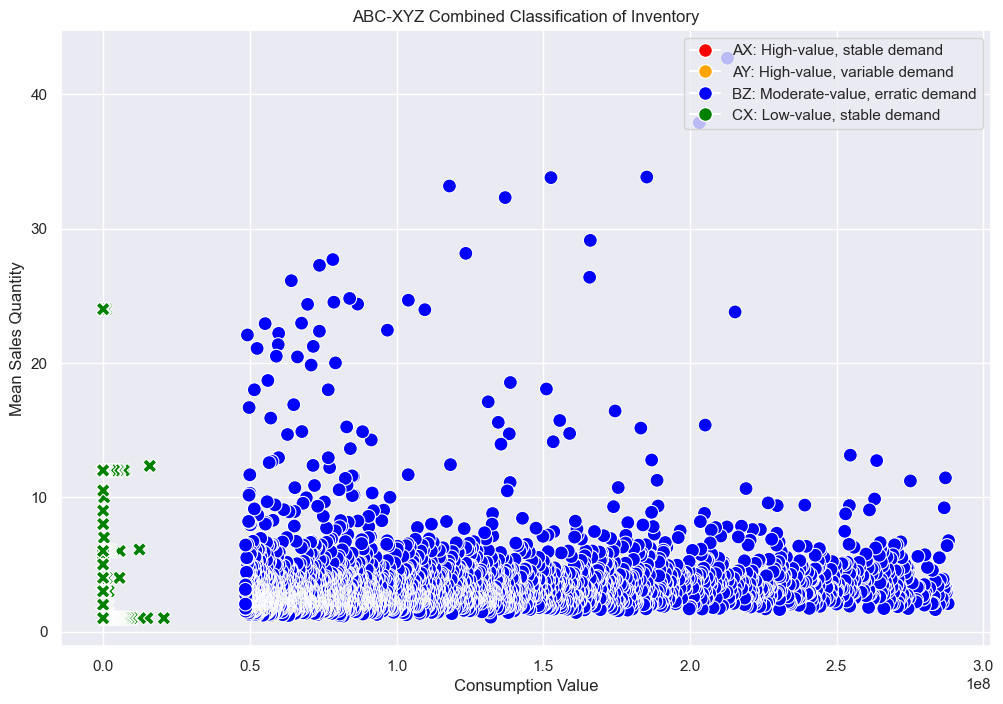

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out non-classified items
filtered_summary = combined_summary[combined_summary['Combined_Class'] != 'Other']

# Create a color map for the different classes
color_map = {
    'AX': 'red',
    'AY': 'orange',
    'BZ': 'blue',
    'CX': 'green'
}

# Plotting
plt.figure(figsize=(12, 8))

# Scatter plot of InventoryId vs ConsumptionValue
sns.scatterplot(
    data=filtered_summary,
    x='ConsumptionValue',
    y='mean',  # Using 'mean' as a proxy for sales data
    hue='Combined_Class',
    palette=color_map,
    style='Combined_Class',
    s=100,
    edgecolor='w'
)

# Add legend with meaning of each category
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map['AX'], markersize=10, label='AX: High-value, stable demand'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map['AY'], markersize=10, label='AY: High-value, variable demand'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map['BZ'], markersize=10, label='BZ: Moderate-value, erratic demand'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map['CX'], markersize=10, label='CX: Low-value, stable demand')
]

plt.legend(handles=handles, loc='upper right')

# Labels and title
plt.xlabel('Consumption Value')
plt.ylabel('Mean Sales Quantity')
plt.title('ABC-XYZ Combined Classification of Inventory')

# Show plot
plt.show()


In [23]:
# Group by combined classification to count the number of items in each category
category_counts = combined_summary['Combined_Class'].value_counts().reset_index()
category_counts.columns = ['Combined_Class', 'Count']


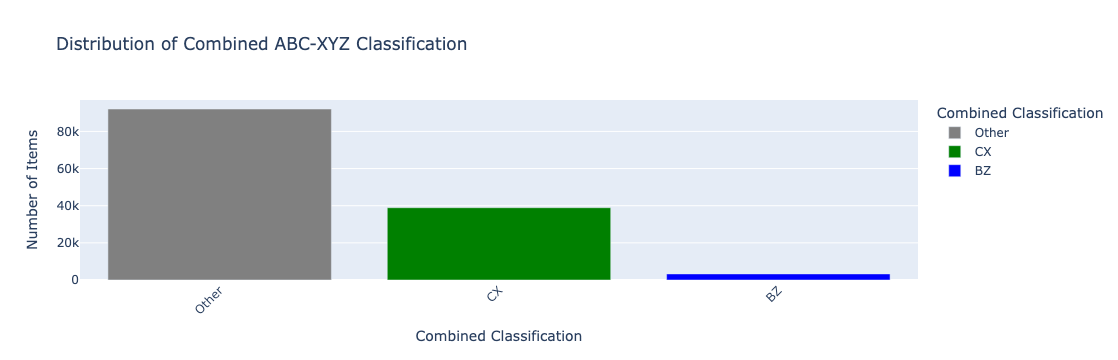

In [25]:
import plotly.express as px

# Create the bar plot
fig = px.bar(
    category_counts,
    x='Combined_Class',
    y='Count',
    color='Combined_Class',
    color_discrete_map=color_map,
    labels={'Count': 'Number of Items', 'Combined_Class': 'Combined Classification'},
    title='Distribution of Combined ABC-XYZ Classification'
)

# Update layout for better readability
fig.update_layout(
    xaxis_title='Combined Classification',
    yaxis_title='Number of Items',
    xaxis=dict(tickangle=-45),
    showlegend=True
)

# Show plot
fig.show()


In [27]:
# Define a function to get top 5 items for a specific combined class
def get_top_items(df, class_name, top_n=5):
    return df[df['Combined_Class'] == class_name].nlargest(top_n, 'ConsumptionValue')

# Extract top 5 items for each combined class
top_ax_items = get_top_items(combined_summary, 'AX')
top_ay_items = get_top_items(combined_summary, 'AY')
top_bz_items = get_top_items(combined_summary, 'BZ')
top_cx_items = get_top_items(combined_summary, 'CX')

# Print top items for each combined class
print("Top 5 AX Items:")
print(top_ax_items[['InventoryId', 'ConsumptionValue', 'mean', 'std']])

print("\nTop 5 AY Items:")
print(top_ay_items[['InventoryId', 'ConsumptionValue', 'mean', 'std']])

print("\nTop 5 BZ Items:")
print(top_bz_items[['InventoryId', 'ConsumptionValue', 'mean', 'std']])

print("\nTop 5 CX Items:")
print(top_cx_items[['InventoryId', 'ConsumptionValue', 'mean', 'std']])


Top 5 AX Items:
Empty DataFrame
Columns: [InventoryId, ConsumptionValue, mean, std]
Index: []

Top 5 AY Items:
Empty DataFrame
Columns: [InventoryId, ConsumptionValue, mean, std]
Index: []

Top 5 BZ Items:
             InventoryId  ConsumptionValue      mean       std
1388   75_BARNCOMBE_3246      2.881362e+08  6.772727  3.558114
1389   73_DONCASTER_4198      2.880048e+08  2.083333  2.062431
1390    41_LARNWICK_3878      2.876173e+08  6.400000  5.985948
1391   32_MOUNTMEND_1376      2.873539e+08  2.904762  2.095346
1392  58_HARTLEPOOL_1376      2.871130e+08  3.260870  1.814522

Top 5 CX Items:
              InventoryId  ConsumptionValue       mean       std
7337    34_PITMERDEN_3733       20717276.44   1.000000  0.000000
8402      41_LARNWICK_294       15926391.00  12.333333  0.816497
8616   58_HARTLEPOOL_6854       15080074.91   1.000000  0.000000
9351        16_LUNDY_6523       12595043.79   1.000000  0.000000
9416  44_PORTHCRAWL_31452       12403036.80   6.111111  0.333333


In [68]:
# for Vizualization 
Sales['Brand'] = Sales['Brand'].astype(str)
Sales['Store'] = Sales['Store'].astype(str)

In [69]:
# Convert Date to datetime
Sales['SalesDate'] = pd.to_datetime(Sales['SalesDate'], errors = "coerce")

### Sales Growth Rate

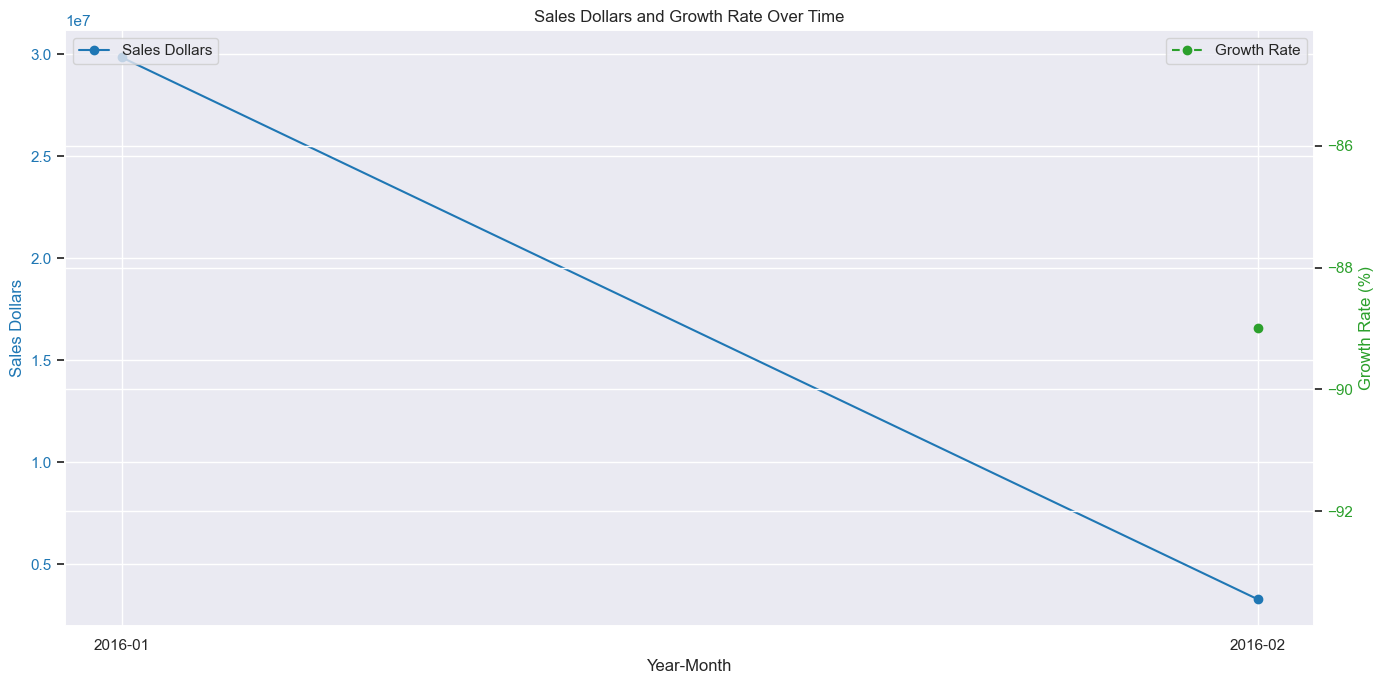

In [70]:
# Convert 'SalesDate' to datetime format
Sales['SalesDate'] = pd.to_datetime(Sales['SalesDate'])

# Create 'YearMonth' column
Sales['YearMonth'] = Sales['SalesDate'].dt.to_period('M')

# Group by 'YearMonth' and sum 'SalesDollars'
sales_per_period = Sales.groupby('YearMonth')['SalesDollars'].sum().reset_index()
sales_per_period['SalesDollars'] = sales_per_period['SalesDollars'].astype(float)

# Calculate Growth Rate
sales_per_period['GrowthRate'] = sales_per_period['SalesDollars'].pct_change() * 100

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot SalesDollars
color = 'tab:blue'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Sales Dollars', color=color)
ax1.plot(sales_per_period['YearMonth'].astype(str), sales_per_period['SalesDollars'], color=color, marker='o', label='Sales Dollars')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis to plot GrowthRate
ax2 = ax1.twinx()  
color = 'tab:green'
ax2.set_ylabel('Growth Rate (%)', color=color)
ax2.plot(sales_per_period['YearMonth'].astype(str), sales_per_period['GrowthRate'], color=color, marker='o', linestyle='--', label='Growth Rate')
ax2.tick_params(axis='y', labelcolor=color)

# Adding titles 
plt.title('Sales Dollars and Growth Rate Over Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()  

# Show plot
plt.show()


In [ ]:

# Extract the day from the date
Sales['Day'] = Sales['SalesDate'].dt.date

# Aggregate sales by day
daily_sales = Sales.groupby('Day')['SalesDollars'].sum().reset_index()

# Plot time series by day
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Day'], daily_sales['SalesDollars'], marker='o', linestyle='-', color='b')
plt.title('Daily Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Sales Dollars')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  # Adjusts plot to ensure labels are not cut off
plt.show()


### Average Order Value (AOV)

In [71]:
#Average Order Value
Sales['OrderValue'] = Sales['SalesDollars'] / Sales['SalesQuantity']
average_order_value = Sales['OrderValue'].mean()
average_order_value


15.431621505376345

In [72]:
# Merge dataframes on common column
merged_df = pd.merge(Sales, Purchases, on='InventoryId', suffixes=('_sales', '_purchases'))

### Total Excise Tax Paid

In [73]:
# Total Excise Tax Paid
total_excise_tax = Sales['ExciseTax'].sum()
total_excise_tax

1391298.6499999994

### Total Sales Revenue per Inventory

In [207]:
total_sales_revenue_brands

Brand
4261    444810.74
3545    357759.17
1233    344712.22
8068    288135.11
3405    275162.97
3858    225014.22
2589    191669.51
4227    183659.91
1376    169922.38
2585    164426.60
Name: SalesDollars, dtype: float64

/var/folders/1t/pv8cn83n2vj7x2cv3ddb0rp00000gn/T/ipykernel_33698/586597135.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_sales_revenue_items.values, y=total_sales_revenue_items.index, palette='viridis')


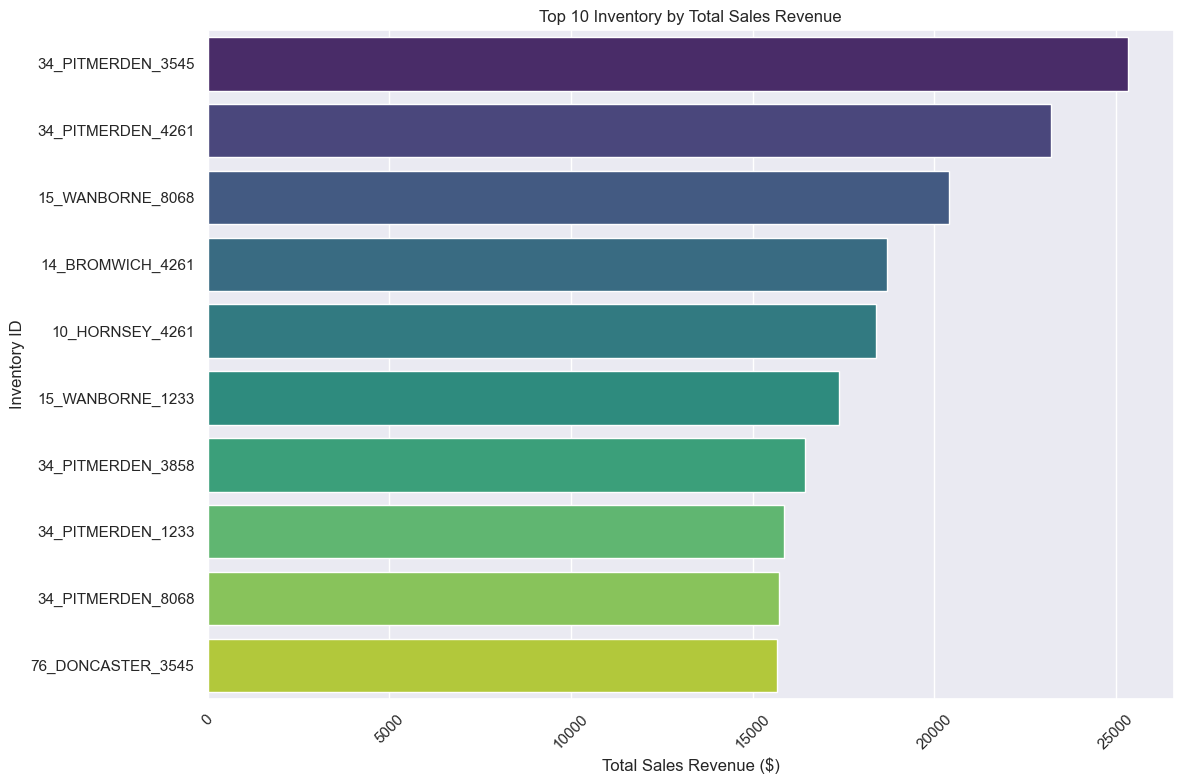

In [74]:
# Total Sales Revenue per Inventory
total_sales_revenue_items = Sales.groupby('InventoryId')['SalesDollars'].sum().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=total_sales_revenue_items.values, y=total_sales_revenue_items.index, palette='viridis')
plt.title('Top 10 Inventory by Total Sales Revenue')
plt.xlabel('Total Sales Revenue ($)')
plt.ylabel('Inventory ID')
plt.xticks(rotation=45)
plt.tight_layout()  


plt.show()

### Total Sales Revenue per Store

/var/folders/1t/pv8cn83n2vj7x2cv3ddb0rp00000gn/T/ipykernel_33698/166585427.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=total_sales_revenue_stores.values, y=total_sales_revenue_stores.index, palette='viridis')


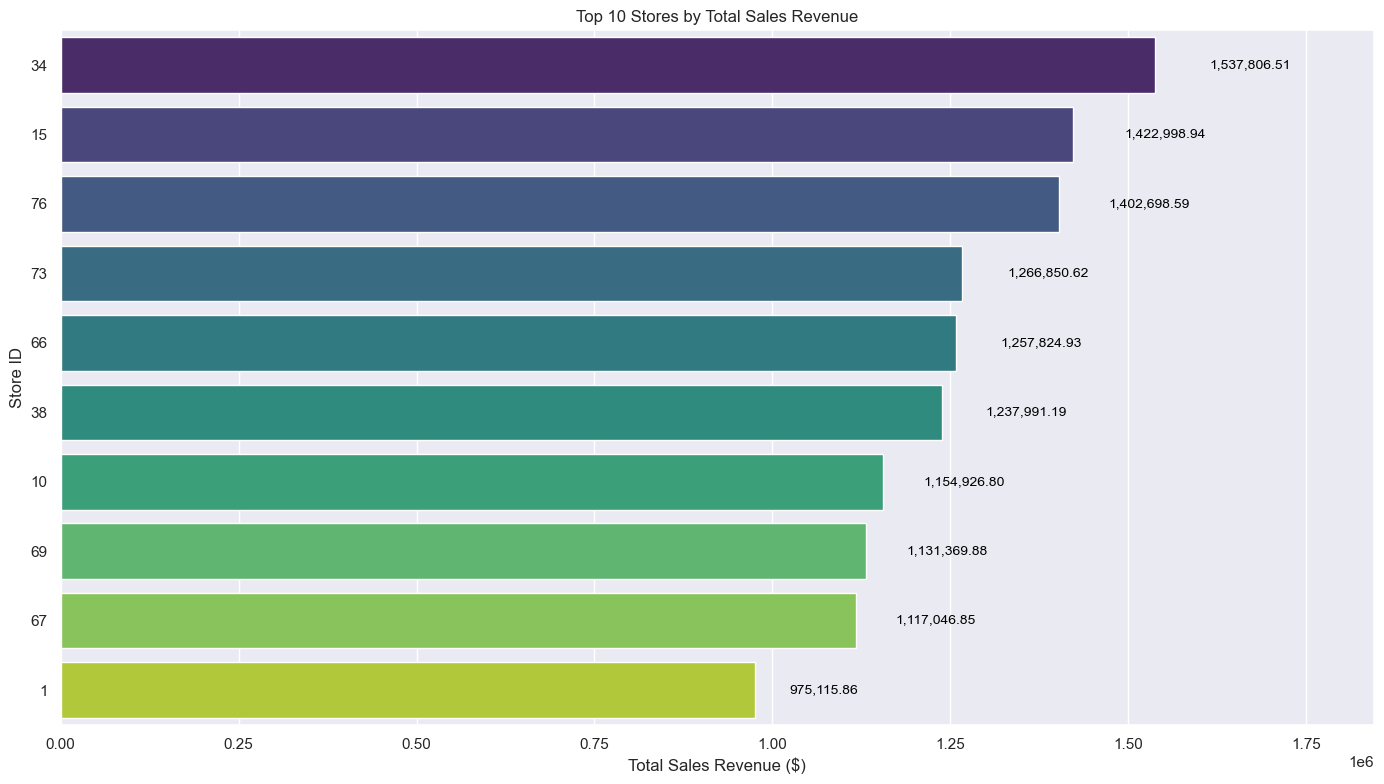

In [75]:
# Total Sales Revenue per Store
total_sales_revenue_stores = Sales.groupby('Store')['SalesDollars'].sum().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=total_sales_revenue_stores.values, y=total_sales_revenue_stores.index, palette='viridis')
plt.title('Top 10 Stores by Total Sales Revenue')
plt.xlabel('Total Sales Revenue ($)')
plt.ylabel('Store ID')

# Adding text annotations above each bar
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:,.2f}', (width + 0.05 * width, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black')

# Optionally, adjust the y-axis limits to make space for annotations
plt.xlim(0, total_sales_revenue_stores.max() * 1.2)

plt.tight_layout()  # Adjust layout to fit labels

# Show plot
plt.show()


#### Total Sales Revenue per Brand

/var/folders/1t/pv8cn83n2vj7x2cv3ddb0rp00000gn/T/ipykernel_33698/202870757.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=total_sales_revenue_brands.values, y=total_sales_revenue_brands.index, palette='viridis')


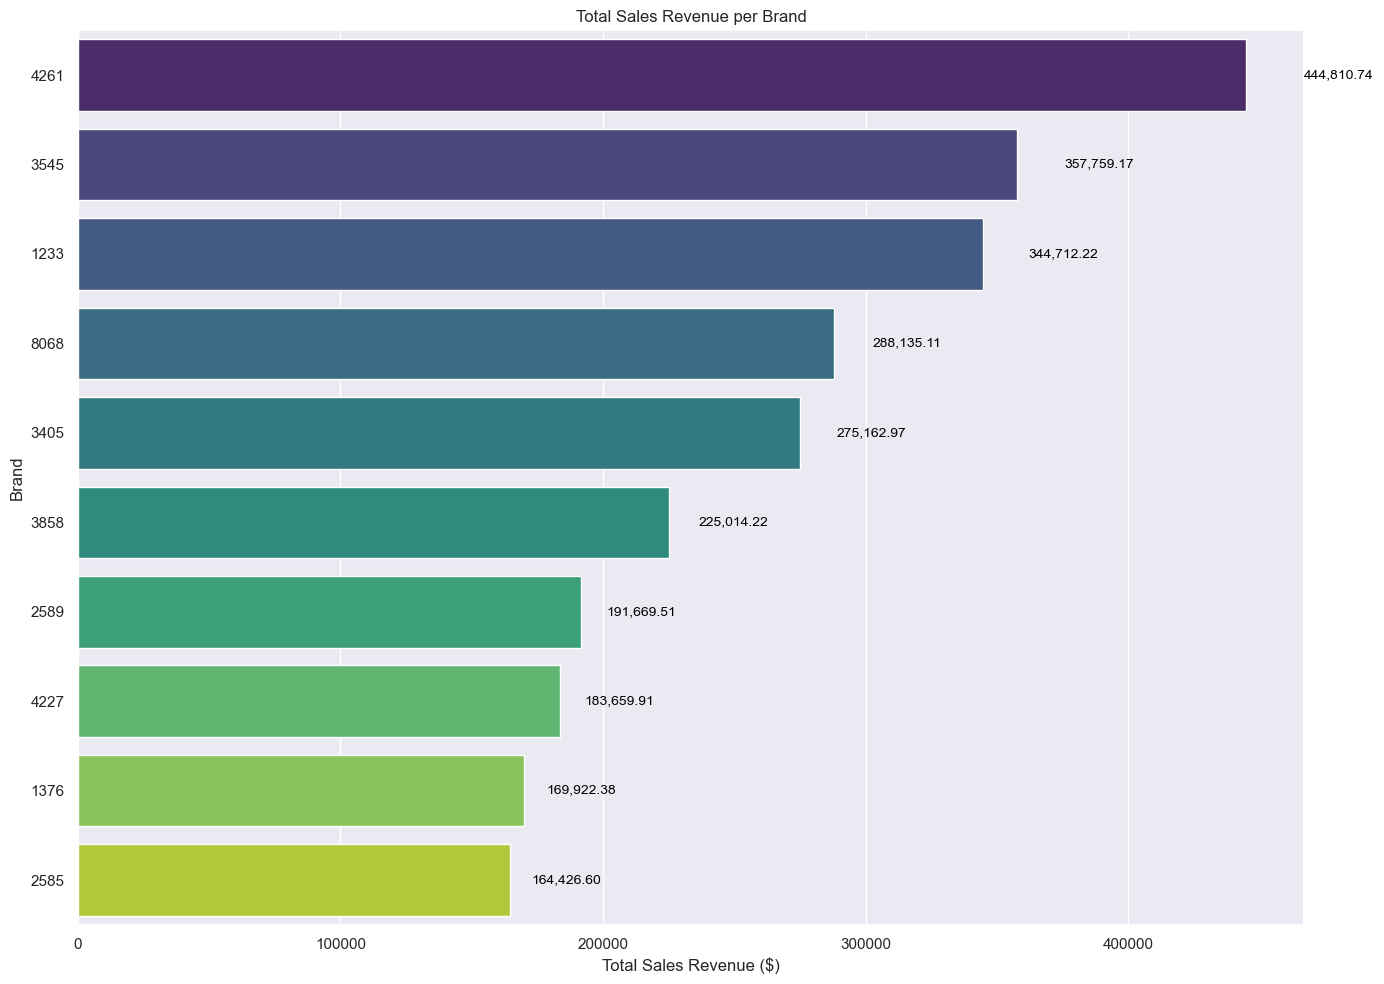

In [76]:
# Total Sales Revenue per Brand
total_sales_revenue_brands = Sales.groupby('Brand')['SalesDollars'].sum().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(14, 10))
ax = sns.barplot(x=total_sales_revenue_brands.values, y=total_sales_revenue_brands.index, palette='viridis')

# Adding text annotations above each bar
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:,.2f}', (width + 0.05 * width, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black')

plt.title('Total Sales Revenue per Brand')
plt.xlabel('Total Sales Revenue ($)')
plt.ylabel('Brand')
plt.tight_layout()  # Adjust layout to fit labels

# Show plot
plt.show()


# Inventory Analysis and Metric

In [77]:
#Check the head
Inventory.head()

,Store,InventoryId,Brand,onHand_start,Price,onHand_end,PurchasedQuantity,SalesQuantity
0,1,1_HARDERSFIELD_1000,1000,0,14.99,0.0,0.0,0.0
1,1,1_HARDERSFIELD_1001,1001,0,11.98,0.0,120.0,0.0
2,1,1_HARDERSFIELD_10021,10021,50,23.98,46.0,24.0,12.0
3,1,1_HARDERSFIELD_1004,1004,221,214.37,0.0,234.0,17.0
4,1,1_HARDERSFIELD_1005,1005,70,349.90,0.0,60.0,11.0


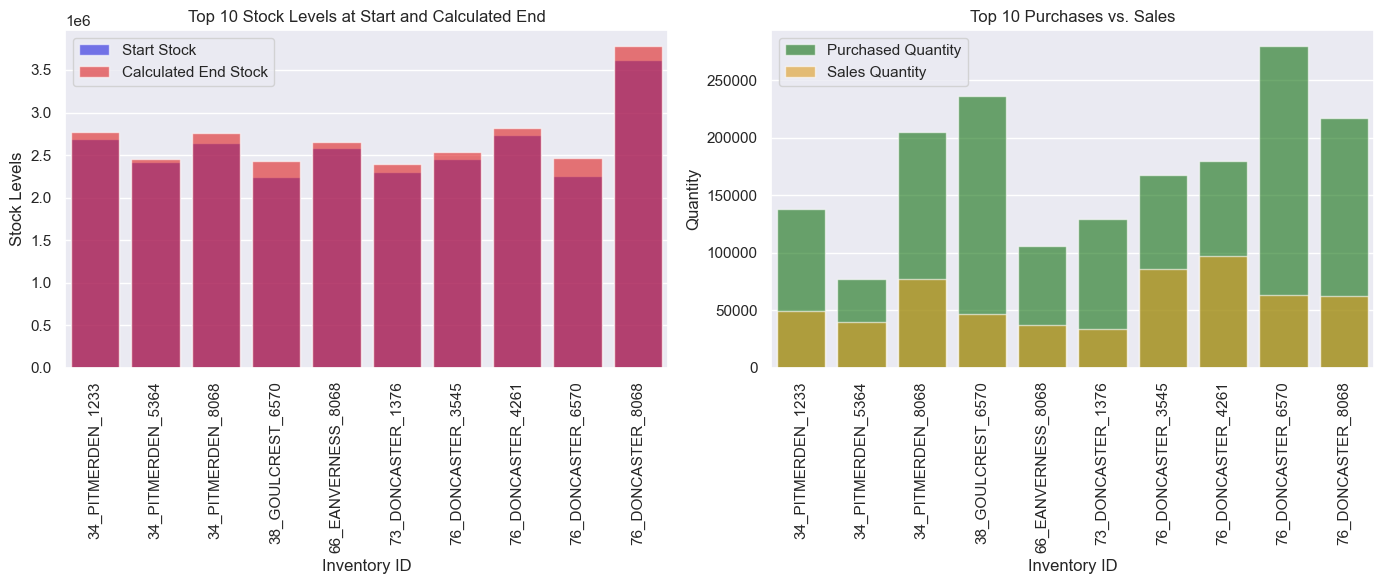

In [78]:
# Calculate Stock Levels
Inventory['CalculatedEndStock'] = Inventory['onHand_start'] + Inventory['PurchasedQuantity'] - Inventory['SalesQuantity']

# Define a metric to sort by (e.g., total purchases, sales, or calculated end stock)
top_n = 10  # Number of top items to plot

# Get top N items by a specific metric (e.g., top 10 items by Calculated End Stock)
top_items = Inventory.groupby('InventoryId')['CalculatedEndStock'].sum().nlargest(top_n).index
top_inventory_df = Inventory[Inventory['InventoryId'].isin(top_items)]

# Plot Top N Items Stock Levels
plt.figure(figsize=(14, 6))

# Plot Initial and Calculated End Stock
plt.subplot(1, 2, 1)
sns.barplot(x='InventoryId', y='onHand_start', data=top_inventory_df, color='blue', label='Start Stock', alpha=0.6)
sns.barplot(x='InventoryId', y='CalculatedEndStock', data=top_inventory_df, color='red', label='Calculated End Stock', alpha=0.6)
plt.xlabel('Inventory ID')
plt.ylabel('Stock Levels')
plt.title(f'Top {top_n} Stock Levels at Start and Calculated End')
plt.xticks(rotation=90)
plt.legend()

# Plot Top N Items Purchases vs. Sales
plt.subplot(1, 2, 2)
sns.barplot(x='InventoryId', y='PurchasedQuantity', data=top_inventory_df, color='green', label='Purchased Quantity', alpha=0.6)
sns.barplot(x='InventoryId', y='SalesQuantity', data=top_inventory_df, color='orange', label='Sales Quantity', alpha=0.6)
plt.xlabel('Inventory ID')
plt.ylabel('Quantity')
plt.title(f'Top {top_n} Purchases vs. Sales')
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()


#### Calculate Net Stock Change

In [79]:
# Calculate Net Stock Change
Inventory['NetStockChange'] = Inventory['CalculatedEndStock'] - Inventory['onHand_start']
Inventory.head()

,Store,InventoryId,Brand,onHand_start,Price,onHand_end,PurchasedQuantity,SalesQuantity,CalculatedEndStock,NetStockChange
0,1,1_HARDERSFIELD_1000,1000,0,14.99,0.0,0.0,0.0,0.0,0.0
1,1,1_HARDERSFIELD_1001,1001,0,11.98,0.0,120.0,0.0,120.0,120.0
2,1,1_HARDERSFIELD_10021,10021,50,23.98,46.0,24.0,12.0,62.0,12.0
3,1,1_HARDERSFIELD_1004,1004,221,214.37,0.0,234.0,17.0,438.0,217.0
4,1,1_HARDERSFIELD_1005,1005,70,349.90,0.0,60.0,11.0,119.0,49.0


### Total Purchases and Sales

In [80]:
# Total Purchases and Sales
total_purchases = Inventory['PurchasedQuantity'].sum()
total_sales = Inventory['SalesQuantity'].sum()
print(f"Inventory Total Purchases is {total_purchases} and Tolal Sales is {total_sales}")

Inventory Total Purchases is 409642451.0 and Tolal Sales is 78068443.0


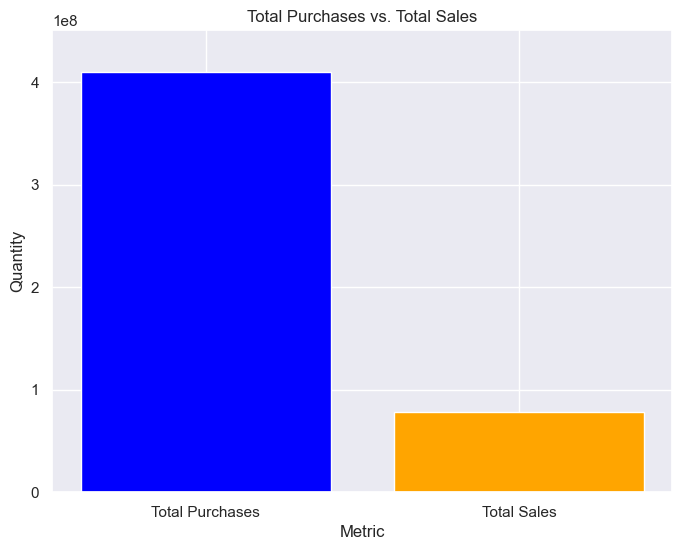

In [81]:
# Plotting
plt.figure(figsize=(8, 6))

# Create a bar plot
plt.bar(['Total Purchases', 'Total Sales'], [total_purchases, total_sales], color=['blue', 'orange'])

# Add labels and title
plt.xlabel('Metric')
plt.ylabel('Quantity')
plt.title('Total Purchases vs. Total Sales')
plt.ylim(0, max(total_purchases, total_sales) * 1.1) 

# Show the plot
plt.show()


### Stock Turnover Ratio

In [82]:
# Stock Turnover Ratio
average_stock = (Inventory['onHand_start'] + Inventory['CalculatedEndStock']) / 2
stock_turnover_ratio = total_sales / average_stock

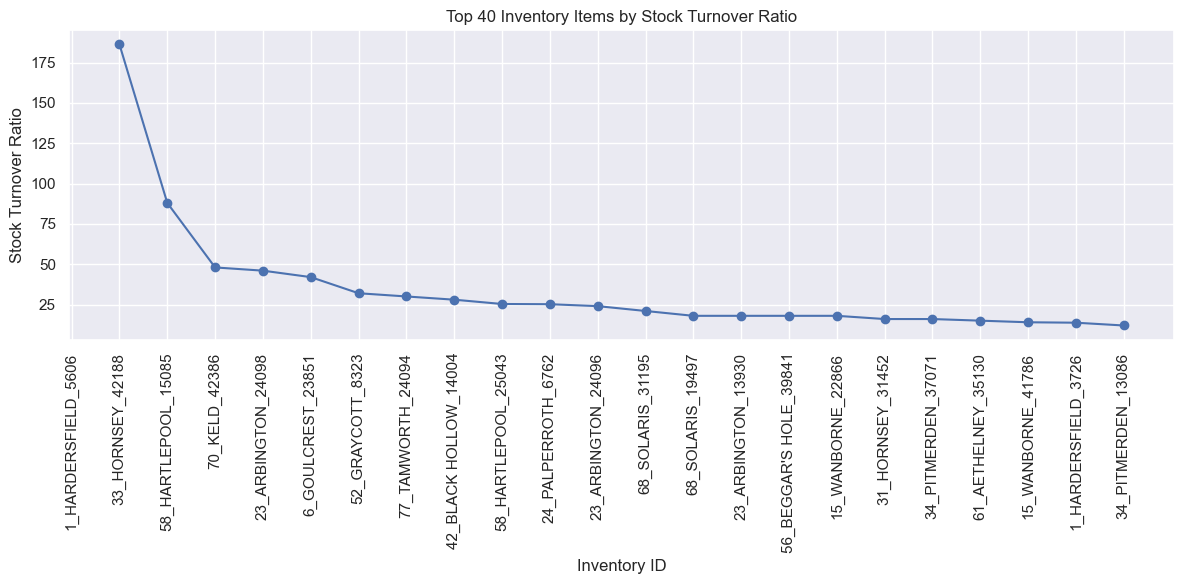

In [83]:
# Calculate average stock
Inventory['AverageStock'] = (Inventory['onHand_start'] + Inventory['CalculatedEndStock']) / 2

# Calculate stock turnover ratio for each inventory item
Inventory['StockTurnoverRatio'] = Inventory['SalesQuantity'] / Inventory['AverageStock']

# Sort by Stock Turnover Ratio and select top N items
top_n = 40  # Change this number to fit your needs
top_inventory = Inventory.sort_values(by='StockTurnoverRatio', ascending=False).head(top_n)

# Plotting
plt.figure(figsize=(12, 6))

# Create a line plot (wave plot) for the top N inventory items
plt.plot(top_inventory['InventoryId'], top_inventory['StockTurnoverRatio'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Inventory ID')
plt.ylabel('Stock Turnover Ratio')
plt.title(f'Top {top_n} Inventory Items by Stock Turnover Ratio')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


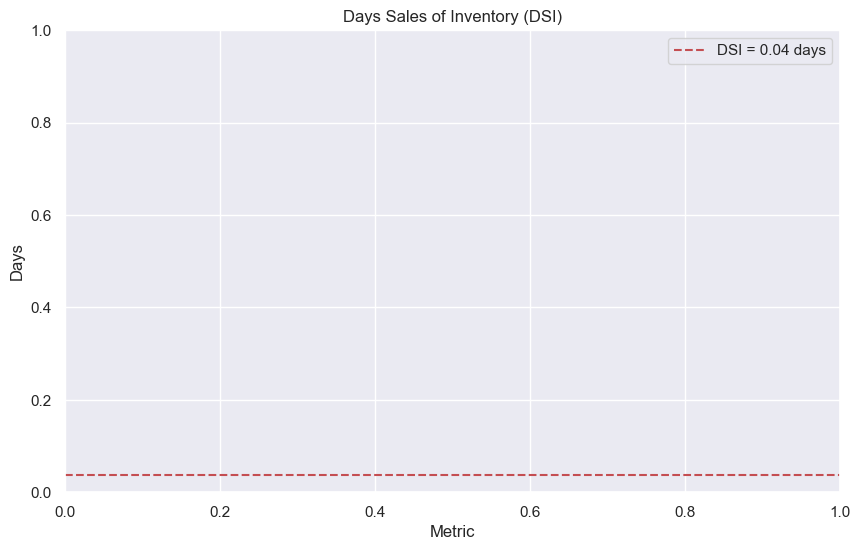

In [84]:
# Calculate total sales
total_sales = Inventory['SalesQuantity'].sum()

# Calculate Inventory Turnover Ratio
average_stock = Inventory['AverageStock'].mean()
inventory_turnover_ratio = total_sales / average_stock

# Calculate Days Sales of Inventory (DSI)
dsi = 365 / inventory_turnover_ratio

# Plotting DSI
plt.figure(figsize=(10, 6))

# Create a horizontal line for DSI
plt.axhline(y=dsi, color='r', linestyle='--', label=f'DSI = {dsi:.2f} days')

# Add labels and title
plt.xlabel('Metric')
plt.ylabel('Days')
plt.title('Days Sales of Inventory (DSI)')
plt.legend()

# Show the plot
plt.show()


### This means that, on average, the inventory is sold and replaced in less than 1 hour (or roughly 58 minutes). This extremely fast turnover rate suggests that the inventory items are either moving very quickly through the system or the inventory is not being held for long periods.